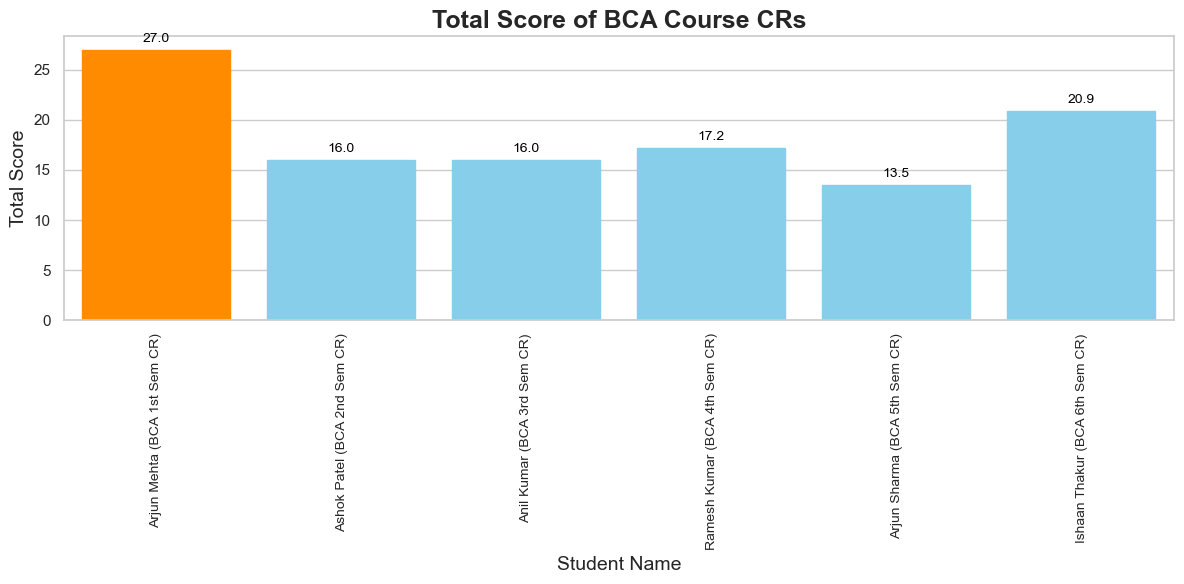

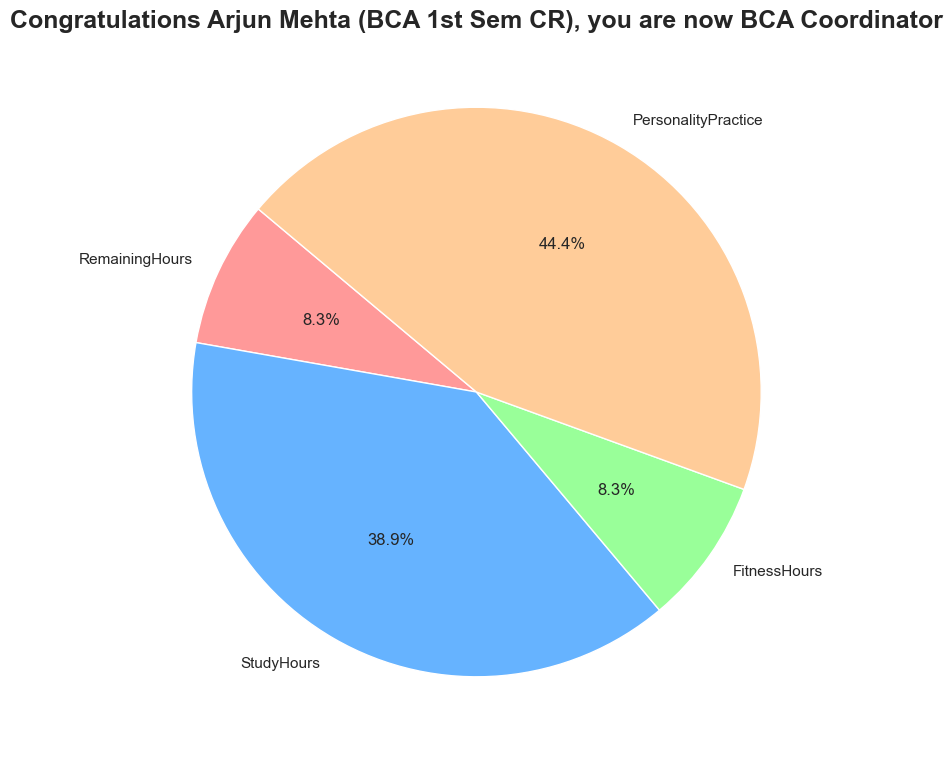

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set global styles for charts
sns.set_theme(style="whitegrid")
plt.rcParams['font.size'] = 12

# Manually created dataset of students
student_data = {
    'Name': [
        "Arjun Mehta (BCA 1st Sem CR)",
        "Ashok Patel (BCA 2nd Sem CR)",
        "Anil Kumar (BCA 3rd Sem CR)",
        "Ramesh Kumar (BCA 4th Sem CR)",
        "Arjun Sharma (BCA 5th Sem CR)",
        "Ishaan Thakur (BCA 6th Sem CR)",
        
    ],
    'GetUpTime': [6, 7, 7, 6, 6, 7],
    'StudyHours': [7, 6, 5, 5, 6, 7],
    'FitnessHours': [1.5, 1.0, 1.0, 1.1, 1.5, 1.2],
    'Personality': [8, 7, 8, 8, 6, 7]
}

# Create DataFrame
df = pd.DataFrame(student_data)

# Normalization process
df['NormalizedGetUpTime'] = 10 - df['GetUpTime']
df['NormalizedStudyHours'] = (
    (df['StudyHours'] - df['StudyHours'].min()) /
    (df['StudyHours'].max() - df['StudyHours'].min()) * 9 + 1  # Scaling to range [1, 10]
)
df['NormalizedFitnessHours'] = df['FitnessHours'] * 2
df['NormalizedPersonality'] = (
    (df['Personality'] - df['Personality'].min()) /
    (df['Personality'].max() - df['Personality'].min()) * 9 + 1  # Scaling to range [1, 10]
)

# Calculate total scores
df['TotalScore'] = (
    df['NormalizedGetUpTime']
    + df['NormalizedStudyHours']
    + df['NormalizedFitnessHours']
    + df['NormalizedPersonality']
)

# Assign roles manually
df['Role'] = 'Student'
df.loc[df['Name'] == "Akhilesh Pant (MCA 1st Sem CR)", 'Role'] = 'CR'

# Identify the student with the maximum TotalScore
max_score_student = df.loc[df['TotalScore'].idxmax(), 'Name']
df.loc[df['Name'] == max_score_student, 'Role'] = 'Coordinator'

# Plot bar chart for all students with total scores
plt.figure(figsize=(12, 6))
bars = sns.barplot(x='Name', y='TotalScore', data=df, edgecolor='black', dodge=False)
bars.set_title('Total Score of BCA Course CRs', fontsize=18, weight='bold')
bars.set_xlabel('Student Name', fontsize=14)
bars.set_ylabel('Total Score', fontsize=14)
plt.xticks(rotation=90, fontsize=10)

# Annotate the bars
for i, p in enumerate(bars.patches):
    color = 'darkorange' if df.iloc[i]['Name'] == max_score_student else 'skyblue'
    p.set_color(color)
    bars.annotate(f'{p.get_height():.1f}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center', fontsize=10, color='black', xytext=(0, 8),
                  textcoords='offset points')

plt.tight_layout()
plt.show()

# Data for MCA Coordinator's daily routine
coordinator_data = df[df['Role'] == 'Coordinator'].iloc[0]
routine_labels = ['RemainingHours', 'StudyHours', 'FitnessHours', 'PersonalityPractice']
remaining_hours = max(0, 24 - coordinator_data['GetUpTime'] - coordinator_data['StudyHours'] - coordinator_data['FitnessHours'] - 8)
routine_hours = [remaining_hours, coordinator_data['StudyHours'], coordinator_data['FitnessHours'], 8]
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(routine_hours, labels=routine_labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title(f"Congratulations {coordinator_data['Name']}, you are now BCA Coordinator", fontsize=18, weight='bold')
plt.tight_layout()
plt.show()
